# Infraestrutura

_____________________________________

> Versão do Python e ambiente virtual

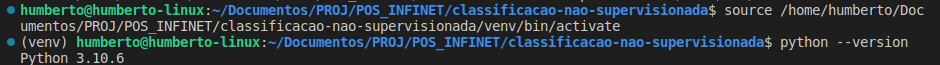

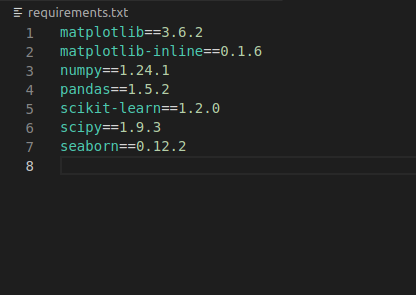

# Libs

## Plot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## Cluster

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Data manipulation

In [3]:
import pandas as pd
import numpy as np
import os

## Data Request

In [4]:
df = pd.read_csv('data/dataset.csv')

# Escolha da base

___________________________________________________________

1- Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
> Dados Bancários de empréstimos

2- Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.
> Trabalhar com dados na área de finanças, buscando aumentar meus conhecimentos no ramo, tendo em vista meu campo de atuação em uma empresa do setor financeiro

3- Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. 

In [5]:
df.describe()

,loan_amount,income,Credit_Score
count,1.486700e+05,139520.000000,148670.000000
mean,3.311177e+05,6957.338876,699.789103
std,1.839093e+05,6496.586382,115.875857
min,1.650000e+04,0.000000,500.000000
25%,1.965000e+05,3720.000000,599.000000
50%,2.965000e+05,5760.000000,699.000000
75%,4.365000e+05,8520.000000,800.000000
max,3.576500e+06,578580.000000,900.000000


<AxesSubplot: >

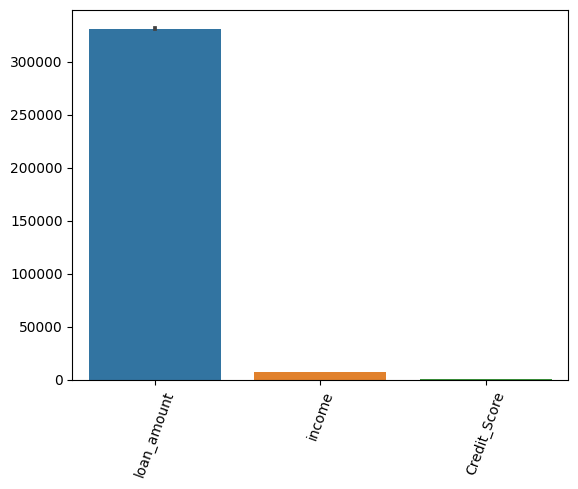

In [6]:
plt.xticks(rotation=70)
sns.barplot(data=df)

4- Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
> As variáveis possuem escalas diferentes, necessitando que seje feita a normalização dos dados, bem como a etapa de pre-processamento, a fim de tratar dados nulos, variáveis categóricas, limpeza de dados, análise gráfica, disposição dos valores, entre outros fatores necessários para que seja feita a correta realização da clusterização.

5- Realize o pré-processamento adequado dos dados. Descreva os passos necessários.
- Leitura dos dados;
- Análise de variáveis;
- Análise gráfica;
- Tratamento de variáveis categóricas;
- Tratamento dos dados nulos;
- Limpeza dos dados;
- Normalização

# Clusterização

____________________________________________________________

1- Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.
> Foi escolhido o número de cluster igual a 2, devido ao maior valor do índice de silhueta, bem como pelo comportamento da distribuição dos dados.

2 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
> As semelhanças é que os dois modelos tiveram melhor performace, tendo como parâmetro o índice de silhueta, com poucos números de cluster. Porém nenhum dos modelos conseguiu um bom agrupamento dos dados, o que leva a pensar que o conjunto escolhido, pode não ser um bom dataset para aplicação de clusterização.
> As diferenças é que o dbscan, agrupou o dataset em um único grupo, e consegue identificar alguns outliers e normalmente este algorítimo tem uma boa performance, para esse tipo de dado não convexo. O Kmeans foi testado com o range de k, variando de 2 a 5, onde a silhueta apresentou seu maior valor em k igual a 2, porém se tratando de dados não convexos, o kmeans normalmente não tem boa resposta, no qual se comprova com as métricas utilizadas, silhueta, magnitude e cardinalidade.

3 - Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.
> cardinalidade e magnitude.

> Cardinalidade: Há uma grande aglomeração de dados em um único grupo, havendo uma disparidade na distribuição dos dados entre os grupos, para todos os números de cluster escolhidos, no algorítimo do kmeans. Analisando o dbscan, temos um único grupo e alguns pontos de outliers, mantendo o mesmo comportamento do kmeans em relação a disparidade.

> Magnitude: Aplicado apenas ao kmeans, devido a lógica de medida, no qual utiliza informações do centróide, não encotrado no dbscan. A magnitude entre os grupos não tem uma equivalência, devido a natureza dos dados, considerando o range de cluster escolhido.

> As duas métricas indicam que não há uma resposta coerente da clusterização neste dataset.

> Comparando com a silhueta a separação em 2 únicos grupos no kmeans, não obteve bons resultado com cardinalidade e magnitude. O número de cluster, onde houve melhor resultado entre as 3 métricas seria com k igual a 3. No dbscan, não é possível uma analise contundente, pois o mesmo agrupos dos dados em um único grupo.

> Foi feita a tentativa de utilização da métrica DBCV, porém a biblioteca informada no cursoestá retornando erro com o dataset utilizado.

4 - Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?
> Não, pois a silhueta é uma métrica que tem bons resultado aplicadas em conjunto de dados convexos, no qual o dbscan normalmente tem sua melhor resposta em dados não convexos. Resultando no cenário em que, onde o dbscan performa não é possível aplicar a silhueta, e vice versa.

## Pre-Processamento

In [7]:
for col in df.columns:
    print(col)

loan_amount
income
Credit_Score
age


In [8]:
df.describe()

,loan_amount,income,Credit_Score
count,1.486700e+05,139520.000000,148670.000000
mean,3.311177e+05,6957.338876,699.789103
std,1.839093e+05,6496.586382,115.875857
min,1.650000e+04,0.000000,500.000000
25%,1.965000e+05,3720.000000,599.000000
50%,2.965000e+05,5760.000000,699.000000
75%,4.365000e+05,8520.000000,800.000000
max,3.576500e+06,578580.000000,900.000000


In [9]:
df.dtypes

loan_amount       int64
income          float64
Credit_Score      int64
age              object
dtype: object

In [10]:
df.nunique()

loan_amount      211
income          1001
Credit_Score     401
age                7
dtype: int64

In [11]:
df.isna().sum()

loan_amount        0
income          9150
Credit_Score       0
age              200
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
def enconding(df, dumies=False):
    if dumies:
        return pd.get_dummies(df, columns=['age'])
    lb = LabelEncoder()
    df_encoding = df.copy()
    df_encoding['age'] = lb.fit_transform(df_encoding[['age']])
    return df_encoding

df_encoding = enconding(df)

/home/humberto/Documentos/PROJ/POS_INFINET/classificacao-nao-supervisionada/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
df_encoding

,loan_amount,income,Credit_Score,age
0,116500,1740.0,758,0
1,206500,4980.0,552,3
2,406500,9480.0,834,1
3,456500,11880.0,587,2
4,696500,10440.0,602,0
...,...,...,...,...
148665,436500,7860.0,659,3
148666,586500,7140.0,569,0
148667,446500,6900.0,702,2
148668,196500,7140.0,737,3


In [15]:
normalizer = Normalizer()
data_normalizer = normalizer.fit_transform(df_encoding)
df_normalizer = pd.DataFrame(data_normalizer)
df_normalizer

,0,1,2,3
0,0.999867,0.014934,0.006506,0.000000
1,0.999706,0.024109,0.002672,0.000015
2,0.999726,0.023315,0.002051,0.000002
3,0.999661,0.026015,0.001285,0.000004
4,0.999887,0.014988,0.000864,0.000000
...,...,...,...,...
139515,0.999837,0.018004,0.001509,0.000007
139516,0.999925,0.012173,0.000970,0.000000
139517,0.999879,0.015452,0.001572,0.000004
139518,0.999333,0.036312,0.003748,0.000015


## Diminuição da dimensionalidade

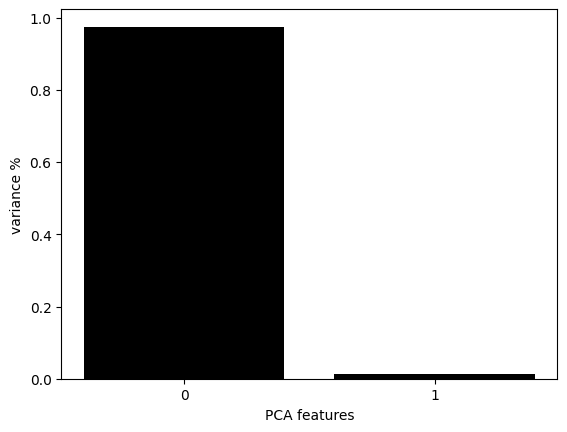

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalizer)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

## Cluster

In [29]:
from sklearn.cluster import DBSCAN
from DBCV import DBCV
from sklearn.metrics.cluster import mutual_info_score
from scipy.spatial.distance import euclidean


class Clustering:
    
    def __init__(self, data: pd.DataFrame, range_n_clusters: list = [2]):
        self.X = data
        self.range_n_clusters = range_n_clusters
        self.n_clusters = None
        self.fit = None
        self.centers = None
        self.cluster_labels = None
        self.silhouette_avg = None
        self.sample_silhouette_values = None

    def start(self, type_method='kmeans'):
        if type_method == 'kmeans':
            for self.n_clusters in self.range_n_clusters:
                self.handle_kmeans()
                self.handle_silhouettes()
                self.handle_plot()
        else:
            self.handle_dbscan()
        self.handle_silhouettes()
        self.handle_plot()
        plt.show()
        return self.handle_return(type_method)

    def handle_return(self, type_method):
        self.X[f'label_{type_method}'] = self.cluster_labels
        return self.X
        
    def handle_kmeans(self):
        clusterer = KMeans(n_clusters=self.n_clusters, n_init=10, random_state=10)
        self.fit = clusterer.fit(self.X)
        self.cluster_labels = self.fit.labels_
        self.centers = self.fit.cluster_centers_
        
    def handle_dbscan(self):
        clusterer = DBSCAN(eps=0.1, min_samples=5)
        self.fit = clusterer.fit(self.X)
        self.cluster_labels = self.fit.labels_
        serie_labels = pd.Series(self.cluster_labels)
        index = []
        for label in serie_labels.unique():
            index.append(serie_labels[serie_labels == label].index.tolist()[0])
        self.centers = clusterer.components_[index]
        self.n_clusters = serie_labels.nunique()
        
    def handle_silhouettes(self):
        self.silhouette_avg = silhouette_score(self.X, self.cluster_labels)
        print(
            "For n_clusters =",
            self.n_clusters,
            "The average silhouette_score is :",
            self.silhouette_avg,
        )

        self.sample_silhouette_values = silhouette_samples(self.X, self.cluster_labels)
    
    def score_DBCV(self, type_method, n_cluster):
        self.n_clusters = n_cluster
        if type_method == 'kmeans':
            self.handle_kmeans()
        else:
            self.handle_dbscan()
        return DBCV(self.X, self.cluster_labels, dist_function=euclidean)

    def others_metrics(self, type_method='Kmeans'):
        if type_method == 'Kmeans':
            for self.n_clusters in self.range_n_clusters:
                self.handle_kmeans()
                card_df = self.cardinalidade()
                mag_df = self.magnitude()
                self.plot_others_metrics(card_df, mag_df, type_method)
        else:
            self.handle_dbscan()
            card_df = self.cardinalidade()
            self.plot_others_metrics(card_df, None, type_method)
        plt.show()

    def cardinalidade(self):
        return pd.DataFrame(self.cluster_labels).value_counts()

    def magnitude(self):
        mag_df = pd.DataFrame(
            zip(
                np.min(self.fit.transform(self.X), axis=1),
                self.fit.labels_
            ),
            columns=['distance_to_center', 'cluster']
        )
        return mag_df

    def plot_others_metrics(self, card_df, mag_df, type_method):
        fig, ax = plt.subplots(1,2, figsize=(11, 4))
        card_df.plot(kind='bar', ax=ax[0])
        ax[0].set_title('Cardinalidade do Modelo')
        ax[0].set_xlabel('Cluster')
        ax[0].set_ylabel('Cardinalidade')

        if type_method == 'Kmeans':
            mag_df.groupby('cluster').sum()['distance_to_center'].plot(kind='bar', ax=ax[1])
            ax[1].set_title('Magnitude do Modelo')
            ax[1].set_xlabel('Cluster')
            ax[1].set_ylabel('Magnitude')

    def score_mutual_info(self, n_cluster):
        self.n_clusters = n_cluster
        self.handle_kmeans()
        label_kmeans = self.cluster_labels
        self.handle_dbscan()
        label_dbscan = self.cluster_labels
        return mutual_info_score(label_kmeans, label_dbscan) 

    def handle_plot(self):
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(self.X) + (self.n_clusters + 1) * 10])
        y_lower = 10
        for i in range(self.n_clusters):
            ith_cluster_silhouette_values = self.sample_silhouette_values[self.cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / self.n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=self.silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.n_clusters)
        ax2.scatter(
            # X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
            self.X.iloc[:, 0], self.X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
        
        ax2.scatter(
            self.centers[:, 0],
            self.centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
        for i, c in enumerate(self.centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % self.n_clusters,
            fontsize=14,
            fontweight="bold",
        )
        

## Silhueta

### Kmeans

For n_clusters = 2 The average silhouette_score is : 0.7484350804553981
For n_clusters = 3 The average silhouette_score is : 0.6893727094026102
For n_clusters = 4 The average silhouette_score is : 0.6106117766095599
For n_clusters = 5 The average silhouette_score is : 0.5532567133649303
For n_clusters = 5 The average silhouette_score is : 0.5532567133649303


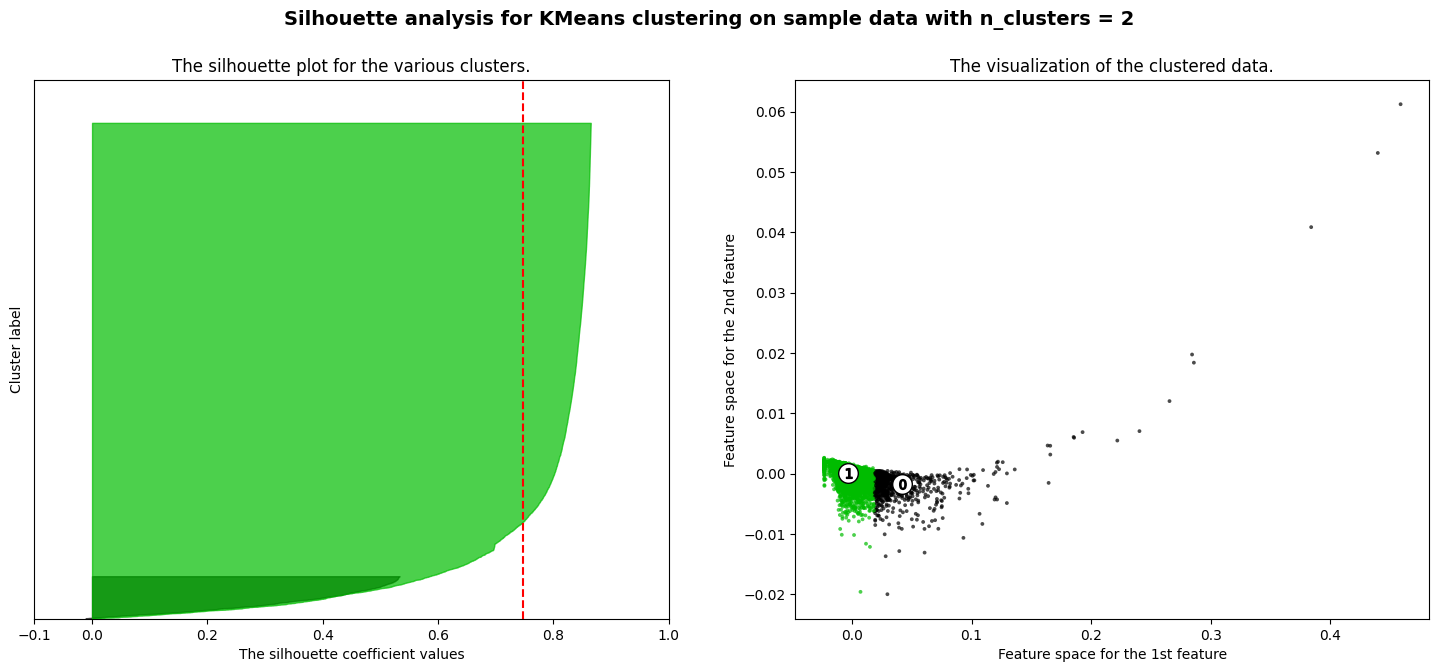

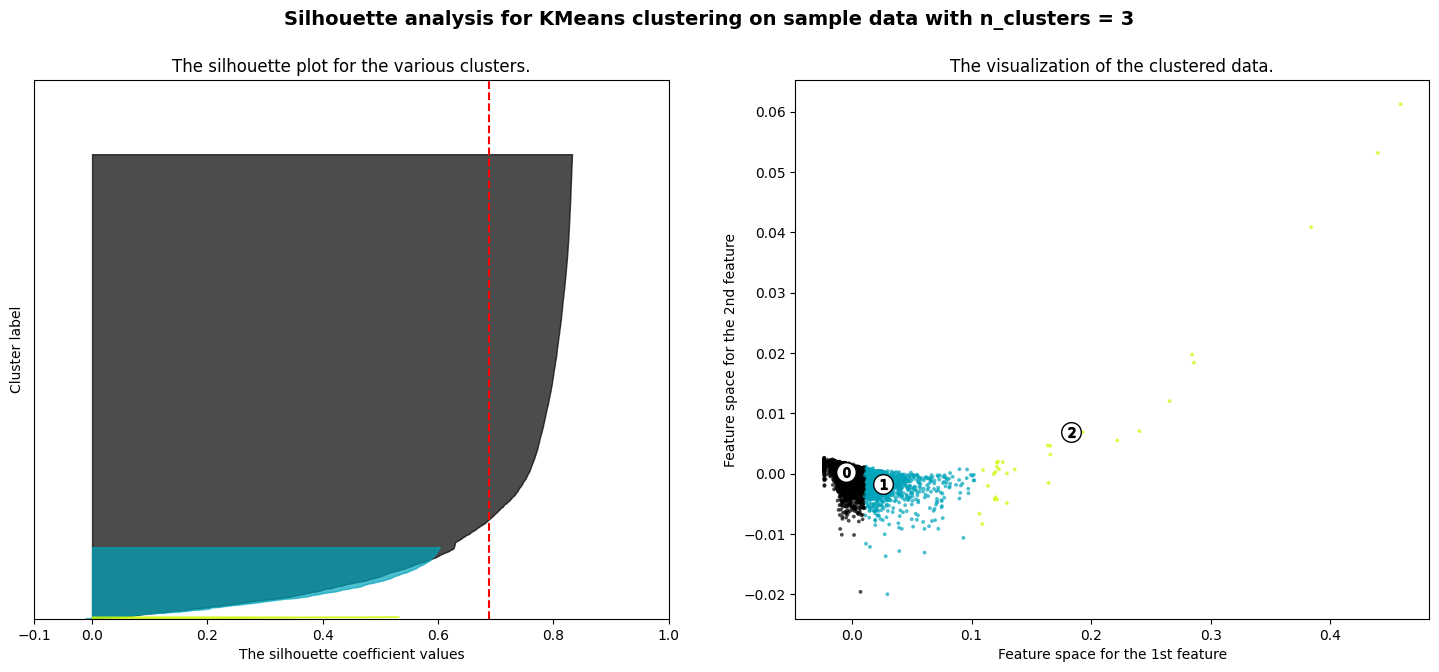

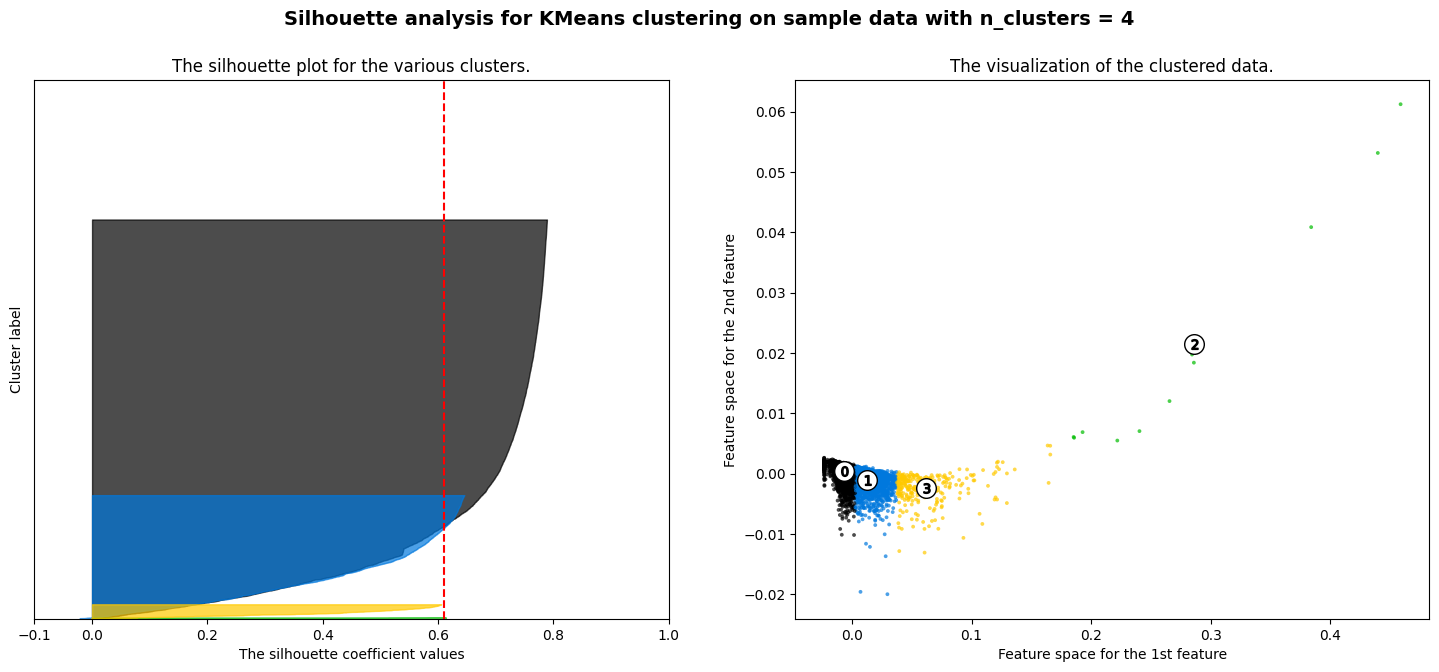

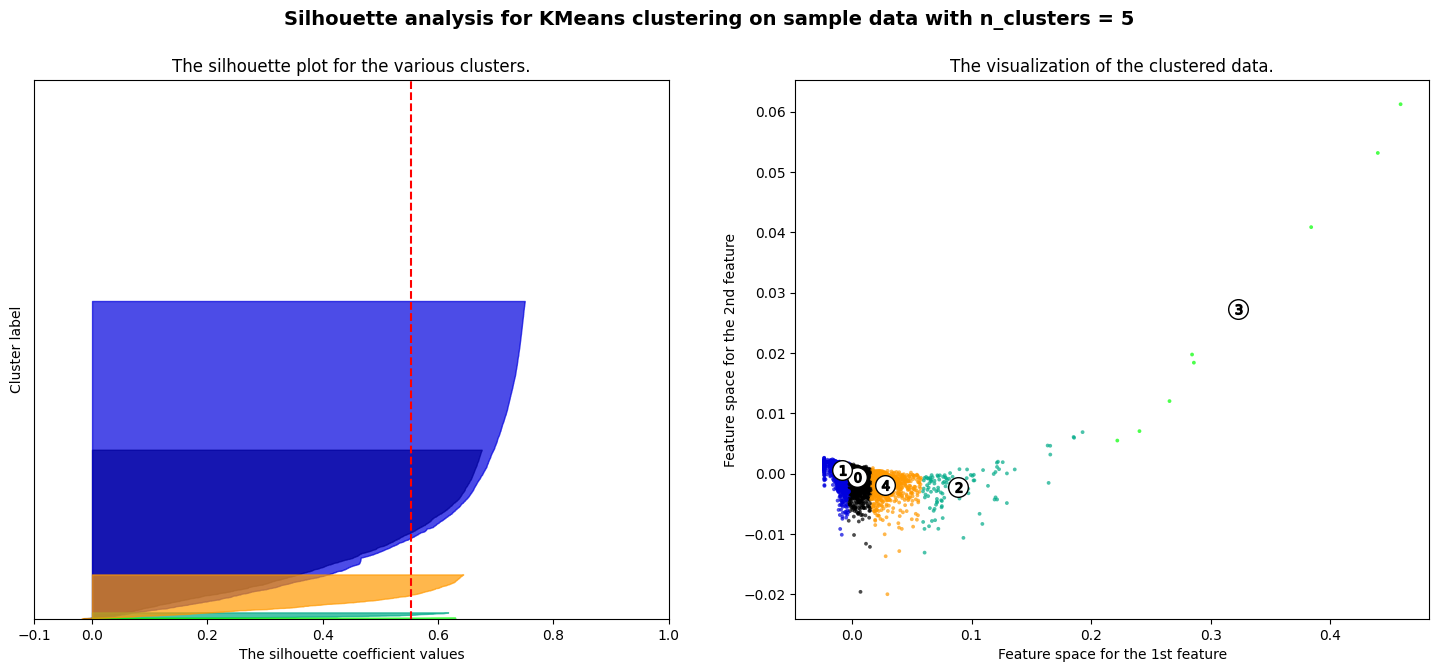

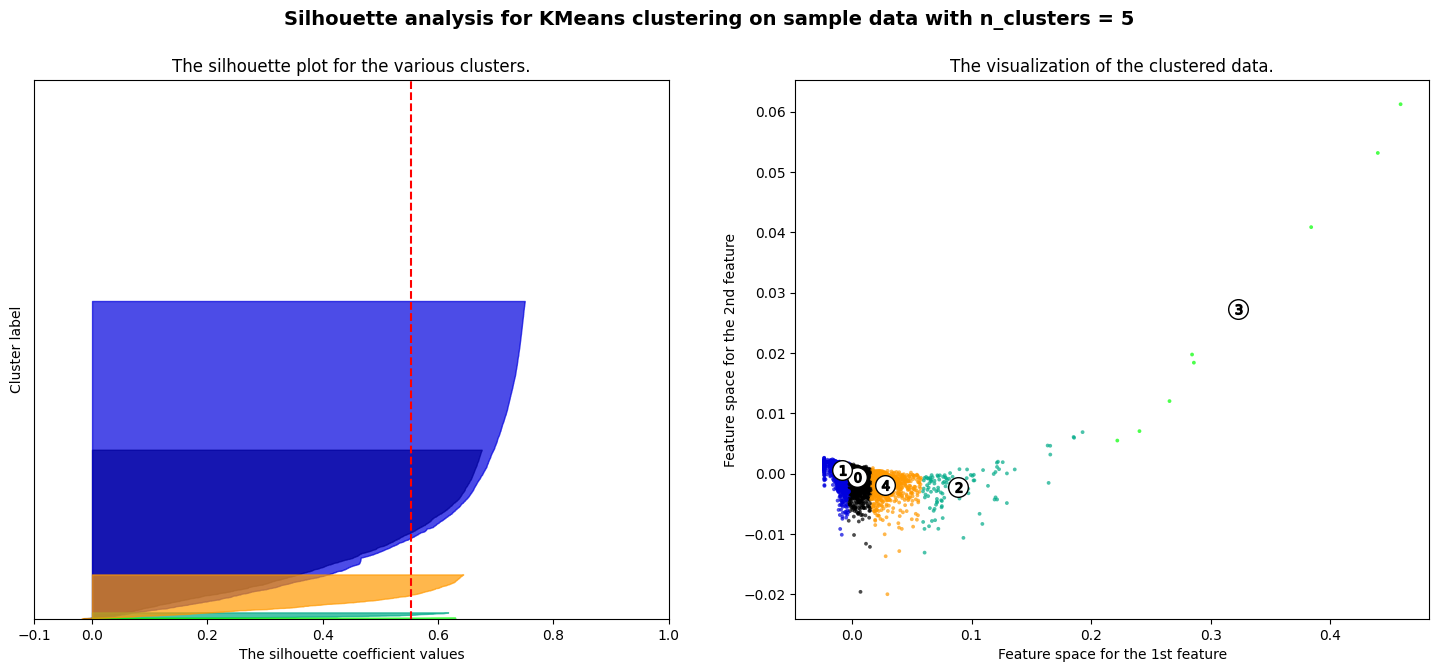

In [18]:
df_label_kmeans = Clustering(PCA_components.sample(10000, random_state=0), [2,3,4,5]).start(type_method='kmeans')
df_label = df_label_kmeans.copy()

### Dbscan

For n_clusters = 2 The average silhouette_score is : 0.9658099512375122


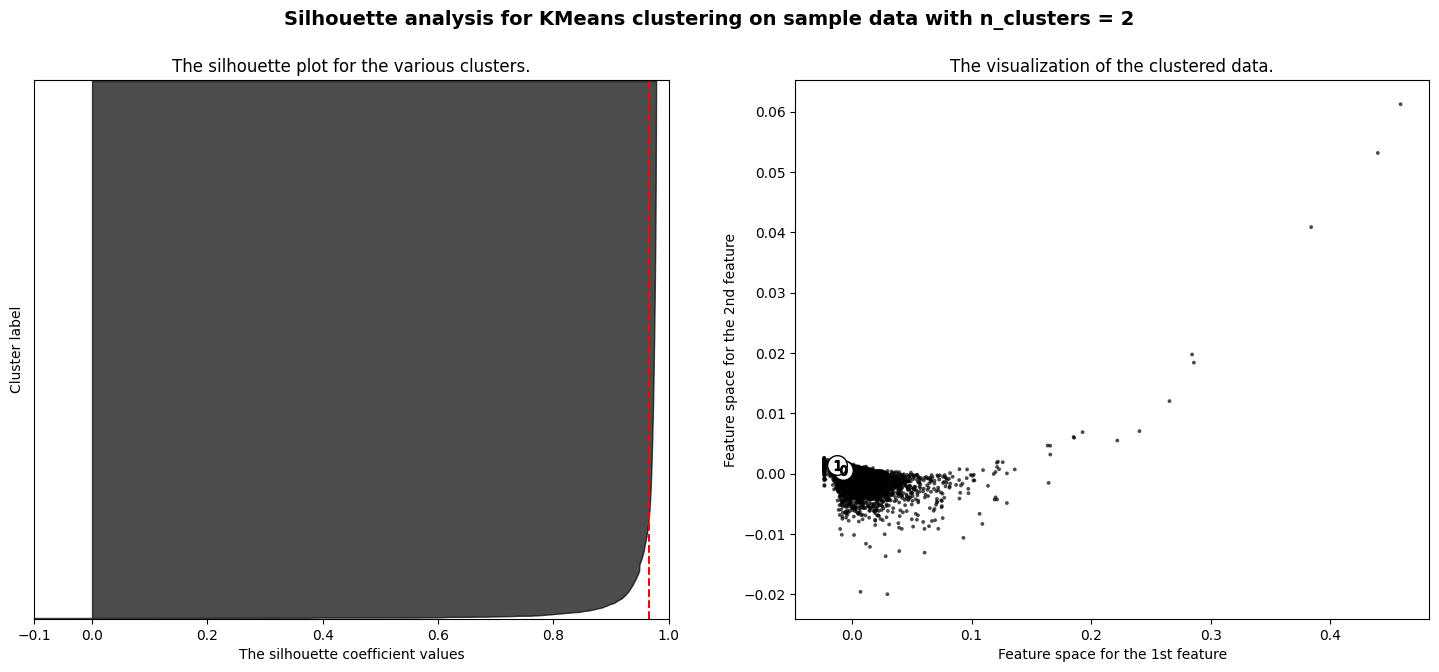

In [19]:
df_label_dbscan = Clustering(PCA_components.sample(10000, random_state=0), [2,3,4,5]).start(type_method='dbscan')
df_label['label_dbscan'] = df_label_dbscan['label_dbscan']

## Informação mútua

In [20]:
score_mutual_info = Clustering(PCA_components.sample(10000, random_state=0)).score_mutual_info(2)
print(f'Score informação mútua: {score_mutual_info}')

Score informação mútua: 0.0007650768697802022


## DBCV

In [21]:
# score_kmeans = Clustering(PCA_components.sample(10000, random_state=0)).score_DBCV(type_method='kmeans', n_cluster=2)
# score_dbscan = Clustering(PCA_components.sample(10000, random_state=0)).score_DBCV(type_method='dbscan', n_cluster=2)

# print(f'Kmeans score DBCV: {score_kmeans}')
# print(f'Dbscan score DBCV: {score_dbscan}')score_kmeans = Clustering(PCA_components.sample(10000, random_state=0)).score_DBCV(type_method='kmeans', n_cluster=2)
# score_dbscan = Clustering(PCA_components.sample(10000, random_state=0)).score_DBCV(type_method='dbscan', n_cluster=2)

# print(f'Kmeans score DBCV: {score_kmeans}')
# print(f'Dbscan score DBCV: {score_dbscan}')

print('A classe informada no curso para DBCV está retornando erro para a implementação utilizada')

A classe informada no curso para DBCV está retornando erro para a implementação utilizada


## Cardinalidade e Magnitude

### K-means

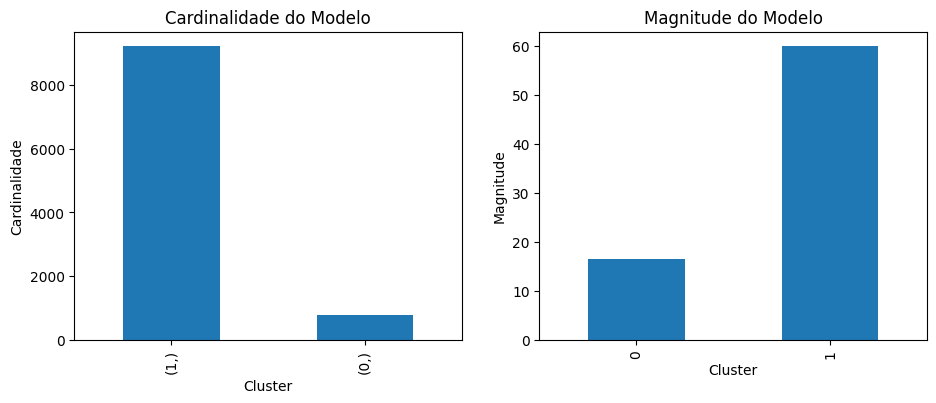

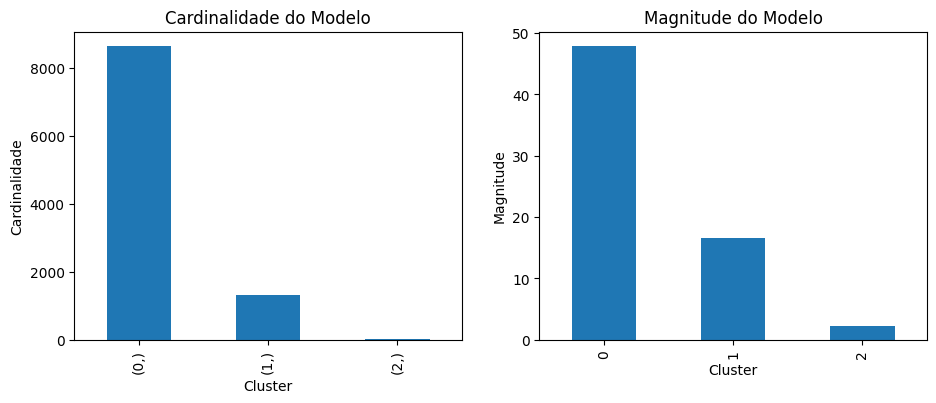

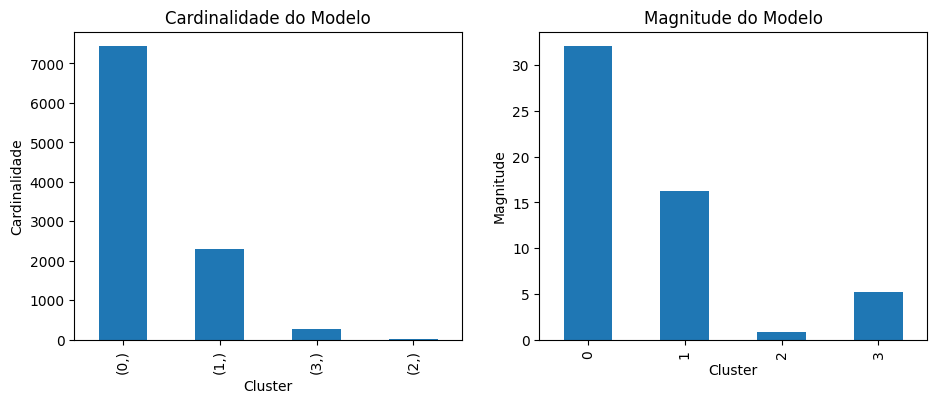

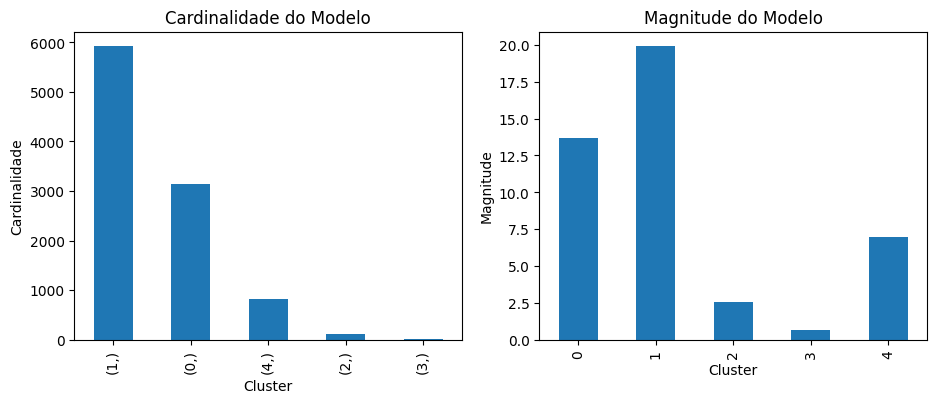

In [27]:
Clustering(PCA_components.sample(10000, random_state=0), [2,3,4,5]).others_metrics()

### Dbscan

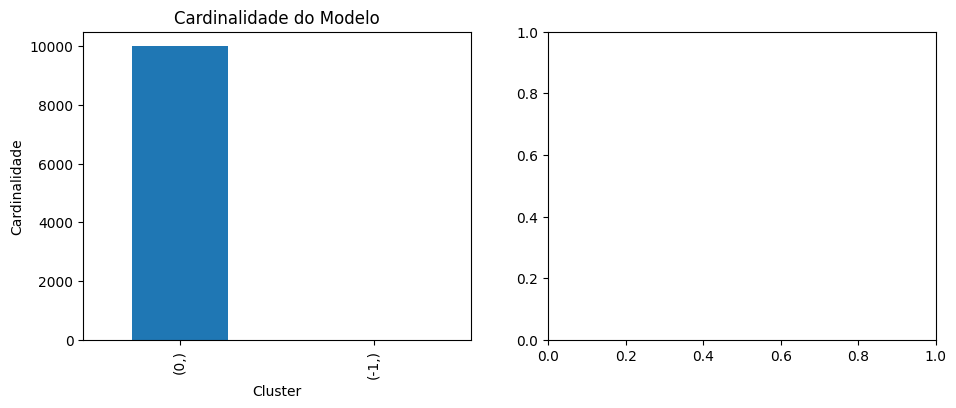

In [30]:
Clustering(PCA_components.sample(10000, random_state=0), [2,3,4,5]).others_metrics(type_method='dbscan')

# Medidas de similaridade

_________________________________________________________________________


1 - Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

Passo:
- Compara as séries em pares
- Mantém uma estática e a outra aplica um offset
- Calcula-se a correlação entre elas ao longo de todo o espaço de tempo adicionando o offset
- Registra o valor de correlção e o offset utilizado
- Identifica o maior valor de correlação e qual o offset foi utilizado
- Ao final da correlação cruzada teremos a maior similaridade para um offset específico
- Esse comparativo é feito entre todas as séries
- O valor do sinal do offset identifica os sinais como leader-follower
- Separação das séries com maior sincronia

2 - Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

- Dbscan, pois a série temporal tende a comportamento de clusters com forma arbitrária, e não convexa, dificultando a classificação pelo método do Kmeans. Para esse tipo de dado o dbscan teria melhor desempenho, devido sua característica de classificação por vizinhança.

3 - Indique um caso de uso para essa solução projetada.

- Preço de ações

4 - Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

> Outra estratégia seria a utilização do método DTW.

Passos:
- Compara as séries em pares
- Faz a corrensapondencia dos sinais pelas amplitudes
- Montagem da matrix de distância aplicando as regras de custo do algorítimo
- A matriz resultará no cálculo do custo mínimo para os dois sinais terem a maior sincronia
- Pela matrix é possível identificar o leader-follower entre os sinais
- Separação das séries com maior sincronia